In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [99]:
df= pd.read_csv("marketing_AB.csv")
df.tail()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23
588100,588100,1237779,ad,False,1,Tuesday,23


In [100]:
df.drop(['Unnamed: 0','user id'],axis=1, inplace=True)


In [101]:
df.sample(10)

,test group,converted,total ads,most ads day,most ads hour
33878,ad,False,106,Tuesday,18
465283,ad,False,6,Thursday,14
477396,ad,False,8,Monday,13
97020,ad,False,18,Tuesday,15
10805,ad,False,12,Tuesday,22
70049,ad,False,15,Friday,20
114149,ad,False,24,Friday,14
465434,ad,False,13,Thursday,18
524239,ad,False,8,Friday,11
76355,ad,False,18,Monday,22


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   test group     588101 non-null  object
 1   converted      588101 non-null  bool  
 2   total ads      588101 non-null  int64 
 3   most ads day   588101 non-null  object
 4   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(2), object(2)
memory usage: 18.5+ MB


In [103]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [104]:
df_cat = df[['test group','converted','most ads day','most ads hour']]
df_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [105]:
for i in df_cat.columns:
    print(i.upper(),":",df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


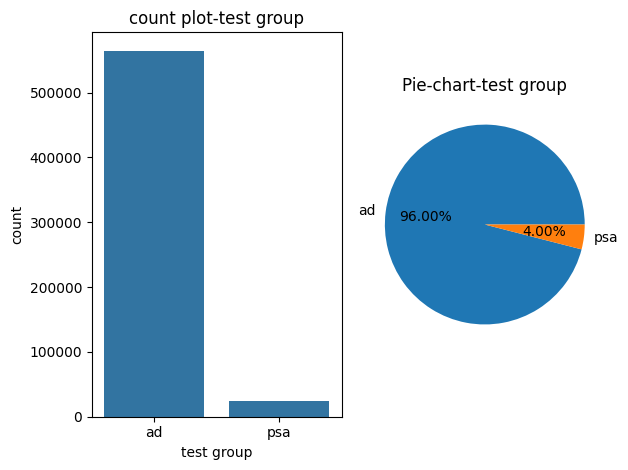

In [106]:
variable="test group"

plt.Figure(figsize=(6,4))

plt.subplot(1,2,1)
sns.countplot(x=variable,data=df_cat)
plt.title(f"count plot-{variable}")

plt.subplot(1,2,2)
counts=df_cat[variable].value_counts()
plt.pie(counts,labels=counts.index,autopct='%0.2f%%')
plt.title(F'Pie-chart-{variable}')

plt.tight_layout()
plt.show()


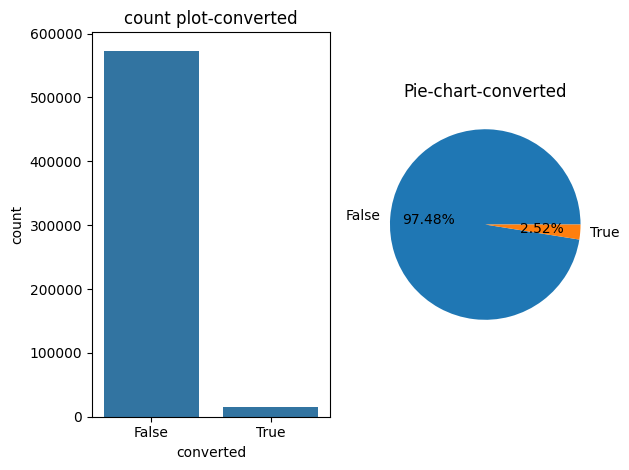

In [107]:
variable="converted"

plt.Figure(figsize=(6,4))

plt.subplot(1,2,1)
sns.countplot(x=variable,data=df_cat)
plt.title(f"count plot-{variable}")

plt.subplot(1,2,2)
counts=df_cat[variable].value_counts()
plt.pie(counts,labels=counts.index,autopct='%0.2f%%')
plt.title(F'Pie-chart-{variable}')

plt.tight_layout()
plt.show()

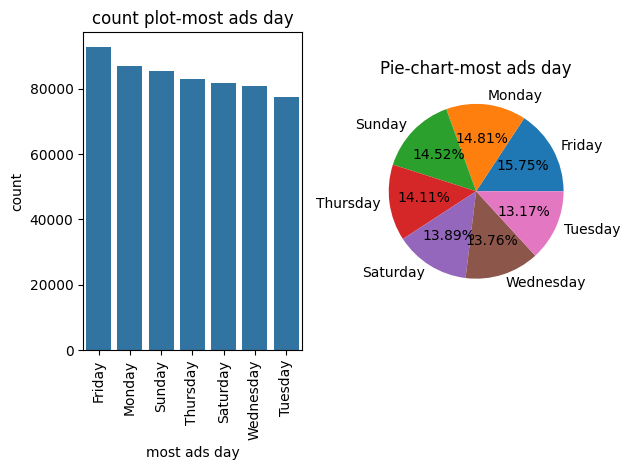

In [108]:
variable="most ads day"

plt.Figure(figsize=(8,4))

plt.subplot(1,2,1)
sns.countplot(x=variable,data=df_cat,order=df_cat['most ads day'].value_counts().index)
plt.title(f"count plot-{variable}")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
counts=df_cat[variable].value_counts()
plt.pie(counts,labels=counts.index,autopct='%0.2f%%')
plt.title(F'Pie-chart-{variable}')

plt.tight_layout()
plt.show()

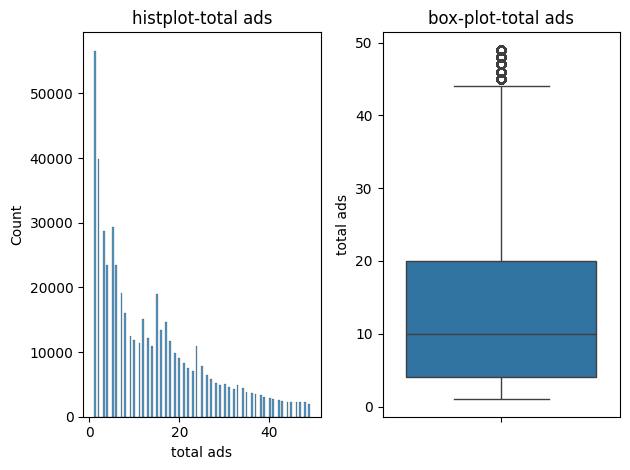

In [109]:
variable="total ads"

plt.Figure(figsize=(6,4))

plt.subplot(1,2,1)
sns.histplot(x=variable,data=df[df['total ads']<50])
plt.title(f"histplot-{variable}")

plt.subplot(1,2,2)
sns.boxplot(y=variable,data=df[df['total ads']<50])
plt.title(F'box-plot-{variable}')

plt.tight_layout()
plt.show()


In [110]:
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

In [111]:
ct_conversion_test_group= pd.crosstab(df['test group'],df['converted'],normalize='index')
ct_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


<Axes: xlabel='test group'>

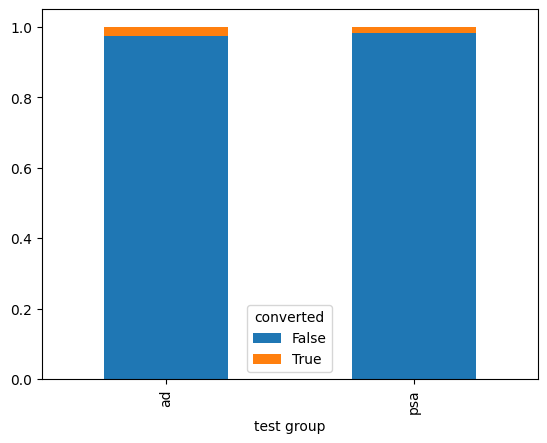

In [112]:
ct_conversion_test_group.plot.bar(stacked=True)

In [113]:

ct_conversion_day= pd.crosstab(df['most ads day'],df['converted'],normalize='index')
print(ct_conversion_day.sort_values(by=True,ascending=False))



converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


<Axes: xlabel='most ads day'>

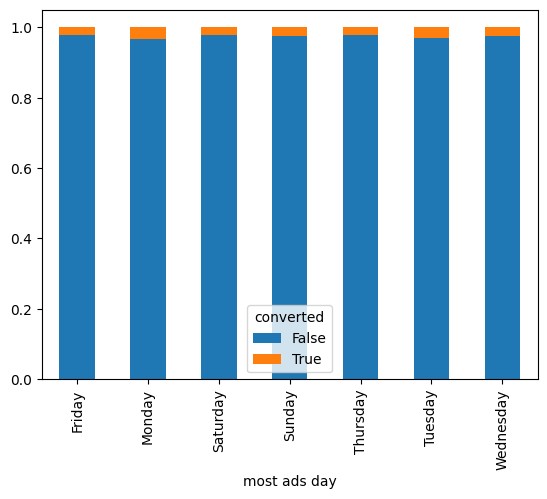

In [114]:
ct_conversion_day.plot.bar(stacked=True)

In [115]:
ct_conversion_hours= pd.crosstab(df['most ads hour'],df['converted'],normalize='index')
print(ct_conversion_hours.sort_values(by=True,ascending=False))



converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


<Axes: xlabel='most ads hour'>

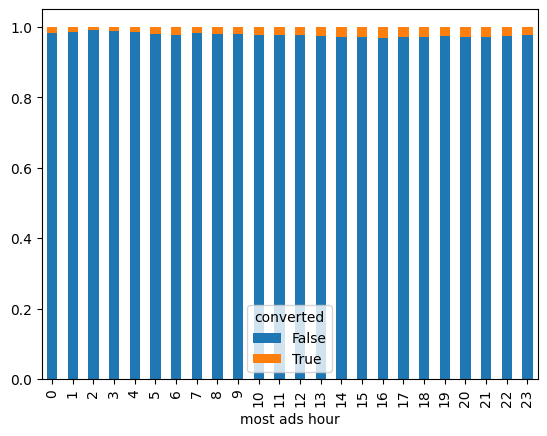

In [116]:
ct_conversion_hours.plot.bar(stacked=True)

## Null Hypothesis (H₀)

##### Conversion is independent of the categorical variable (No relationship)

## Alternative Hypothesis (H₁)

##### Conversion depends on the categorical variable (There is a relationship)



In [117]:
df_cat.columns

Index(['test group', 'converted', 'most ads day', 'most ads hour'], dtype='object')

In [118]:
from scipy.stats import chi2_contingency

alpha=0.05
for variable in df_cat.columns:
    if variable!='converted':
        contigency_table= pd.crosstab(df_cat[variable], df_cat['converted'])
        print(contigency_table)

        chi2, p, _, _= chi2_contingency(contigency_table)
        print(F"chi test for {variable} vs converted")

        print("Chi-square value:", chi2)
        print("P-value:", p)

        if p<alpha:
            print(F"the diffresnce in conversion rate across {variable} is significant")
        else:
            print(F"not significant")


converted    False  True 
test group               
ad          550154  14423
psa          23104    420
chi test for test group vs converted
Chi-square value: 54.005823883685245
P-value: 1.9989623063390075e-13
the diffresnce in conversion rate across test group is significant
converted     False  True 
most ads day              
Friday        90551   2057
Monday        84216   2857
Saturday      79941   1719
Sunday        83301   2090
Thursday      81192   1790
Tuesday       75167   2312
Wednesday     78890   2018
chi test for most ads day vs converted
Chi-square value: 410.0478857936585
P-value: 1.932184379244731e-85
the diffresnce in conversion rate across most ads day is significant
converted      False  True 
most ads hour              
0               5434    102
1               4740     62
2               5294     39
3               2651     28
4                711     11
5                749     16
6               2022     46
7               6289    116
8              17283    3

## Which day-hour combinations have the highest conversion?

In [119]:
df_ads= df[df['test group']=='ad']

df_ads

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14
...,...,...,...,...,...
588096,ad,False,1,Tuesday,23
588097,ad,False,1,Tuesday,23
588098,ad,False,3,Tuesday,23
588099,ad,False,1,Tuesday,23


In [120]:
day_performance= df_ads.groupby('most ads day').agg(
    users=('converted',"count"),
    conversions=('converted', 'sum')
)

day_performance

,users,conversions
most ads day,,
Friday,88805,1995
Monday,83571,2778
Saturday,78802,1679
Sunday,82332,2027
Thursday,79077,1711
Tuesday,74572,2270
Wednesday,77418,1963


In [121]:
day_performance['conversion_rate']= day_performance['conversions']/ day_performance['users']
day_performance.sort_values('conversion_rate', ascending=False)

,users,conversions,conversion_rate
most ads day,,,
Monday,83571,2778,0.033241
Tuesday,74572,2270,0.030440
Wednesday,77418,1963,0.025356
Sunday,82332,2027,0.024620
Friday,88805,1995,0.022465
Thursday,79077,1711,0.021637
Saturday,78802,1679,0.021307


In [122]:
ct_day= pd.crosstab(df_ads['most ads day'], df_ads['converted'])
ct_day

converted,False,True
most ads day,,
Friday,86810,1995
Monday,80793,2778
Saturday,77123,1679
Sunday,80305,2027
Thursday,77366,1711
Tuesday,72302,2270
Wednesday,75455,1963


In [123]:
chi2, p, dof, expected = chi2_contingency(ct_day)
alpha=0.05
print(F"chi test for days vs converted")
print("Chi-square value:", chi2)
print("P-value:", p)
if p<alpha:
     print("Conversion significantly depends on day")
else:
    print(F"not significant")

chi test for days vs converted
Chi-square value: 412.79432508817627
P-value: 4.9594891936593376e-86
Conversion significantly depends on day


In [124]:
time_performance= df_ads.groupby('most ads hour').agg(
    users=('converted',"count"),
    conversions=('converted', 'sum')
)
time_performance

,users,conversions
most ads hour,,
0,5309,102
1,4615,62
2,5152,39
3,2590,27
4,694,11
5,742,16
6,1985,46
7,6168,114
8,16968,337


In [125]:
time_performance['conversion_rate']= time_performance['conversions']/ time_performance['users']
time_performance.sort_values('conversion_rate',ascending=False)

,users,conversions,conversion_rate
most ads hour,,,
16,35963,1111,0.030893
20,27846,843,0.030274
15,42855,1279,0.029845
21,28895,843,0.029175
14,43779,1251,0.028575
17,33605,959,0.028537
18,31052,853,0.027470
19,29169,782,0.026809
22,25515,675,0.026455


In [126]:
ct_hour= pd.crosstab(df_ads['most ads hour'],df_ads['converted'])
ct_hour

converted,False,True
most ads hour,,
0,5207,102
1,4553,62
2,5113,39
3,2563,27
4,683,11
5,726,16
6,1939,46
7,6054,114
8,16631,337


In [127]:
chi2, p, dof, expected = chi2_contingency(ct_hour)
alpha=0.05
print(F"chi test for hours vs converted")
print("Chi-square value:", chi2)
print("P-value:", p)
if p<alpha:
     print("Conversion significantly depends on hours")
else:
    print(F"not significant")

chi test for hours vs converted
Chi-square value: 403.32698566404406
P-value: 3.671278759525808e-71
Conversion significantly depends on hours


In [128]:

def cramers_v(table):
    chi2 = chi2_contingency(table)[0]
    n = table.sum().sum()
    r, k = table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

print("Cramer's V (Hour):", cramers_v(ct_hour))
print("Cramer's V (Day):", cramers_v(ct_day))


Cramer's V (Hour): 0.026728036115756276
Cramer's V (Day): 0.027039911649063577
